## Import libraries

In [35]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
#import pylab as pl
import pandas as pd
import numpy as np

## Read data and take the first look

In [36]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Narrow data

In [38]:
cdf = df[["ENGINESIZE", "CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


## Vizualize dependency

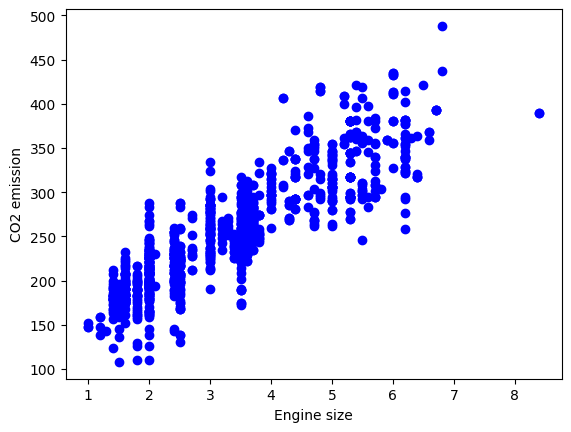

In [39]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

## Split data into train set and test set

At the line *msk = np.random.rand(len(cdf)) < 0.8* we create an array msk that contains random boolean values. The number of elements in **msk** is equal to the number of rows in the DataFrame **cdf**. Each **msk** element will be *True* with probability 0.8 and *False* with probability 0.2. This creates a random split of the data where about 80% of the data belongs to the training set.

DataFrame **train** contains rows from DataFrame **cdf**, where the corresponding values in the msk array are **True**. DataFrame **test** contains rows from the DataFrame **cdf** where the corresponding values in the msk array are **False**.

In [40]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Train the model

In [41]:
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x, train_y)

print("Coefficients:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficients: [[38.82689556]]
Intercept: [126.11152155]


## Vizualize the model

Text(0, 0.5, 'CO2 emission')

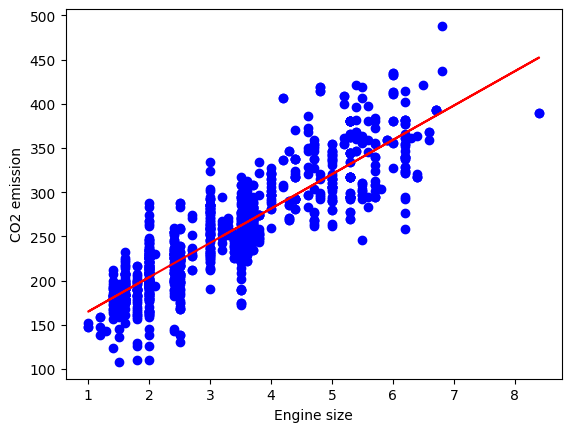

In [42]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], color = 'red')
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")

## Test the model

In [43]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict_y = regression.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predict_y - test_y)))
print("Mean Squared Error: %.2f" % np.mean((predict_y - test_y)**2))
print("R2-score: %.2f" % r2_score(predict_y, test_y))

Mean Absolute Error: 22.49
Mean Squared Error: 907.64
R2-score: 0.66


## Make prediction for new data

In [44]:
new_data = np.array([[4.1]])
prediction = regression.predict(new_data)
print("Engine size: ", new_data)
print("CO2 emission prediction: %.2f" % prediction)

Engine size:  [[4.1]]
CO2 emission prediction: 285.30
